<a href="https://colab.research.google.com/github/danielzt12/AD_LTEM/blob/main/EdgeIce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite

In [ ]:
!pip install ncempy

     |████████████████████████████████| 276kB 2.8MB/s 


In [ ]:
import numpy as np
from ncempy.io import dm
from matplotlib import pyplot, colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import *
import sys
import os
from scipy import signal, optimize, ndimage
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, IntProgress
import ipywidgets as widgets
from skimage import feature

In [ ]:
# You need to grant access to your google drive each time
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load data

In [ ]:
# Where the file is saved, I changed the folder name to a simple one, you need to do the same
folder = '/content/drive/My Drive/Test_E_Diff/EdgeExtraction/A4(135K~150K)/'

In [ ]:
# load data
imagelist = [img for img in os.listdir(folder) if img.endswith('dm3')]
indexlist = np.array([int(filename.split(".")[-2].split("_")[-1]) for filename in imagelist])
imagelist = np.take(imagelist , indexlist.argsort())
indexlist.sort()
nimage = len(imagelist)
data = np.zeros((len(imagelist), 1852,1852))
for i in range(nimage):
  data[i] = dm.dmReader(folder+imagelist[i])['data']

In [ ]:
# figure out the usable size
xmin = 0
xmax = 1851
ymin = 0
ymax = 1851
for i in range(nimage):
  ll = data[i].std(0).nonzero()
  xmin = max(np.array(ll).min(), xmin)
  xmax = min(np.array(ll).max(), xmax)
  ll = data[i].std(1).nonzero()
  ymin = max(np.array(ll).min(), ymin)
  ymax = min(np.array(ll).max(), ymax)
print(xmin,xmax,ymin,ymax)
data = data[:,ymin:ymax+1, xmin:xmax+1]
nx = xmax-xmin+1
ny = ymax-ymin+1

229 1498 125 1729


204.0


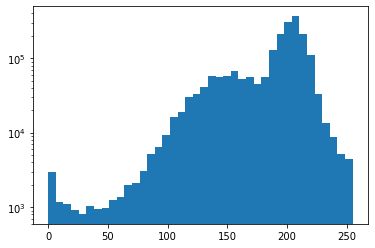

In [ ]:
t = pyplot.hist(data[16].flatten(), 40, log=True);
print(t[1][t[0].argmax()])

In [ ]:
# A quick look at the data
def iplot(i, iterations):
  f, ax = pyplot.subplots(figsize=(8,8))
  threshold = 
  mask = ndimage.morphology.binary_opening(data[i]<threshold, iterations=iterations)
  im = ax.imshow(data[i]*mask, norm=colors.Normalize(), cmap='jet', interpolation='none', origin='lower')
  ax.set_aspect(1)
  ax.set_axis_off()
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('bottom', size='5%', pad=0.05)
  f.colorbar(im, cax=cax, orientation='horizontal');
interactive_plot = interactive(iplot, i=(0, len(imagelist)-1),  iterations=(0,10))
interactive_plot

interactive(children=(IntSlider(value=16, description='i', max=32), IntSlider(value=202, description='threshol…

In [ ]:
# A quick look at the data
def iplot(i, sig, lo, hi):
  f, ax = pyplot.subplots(figsize=(12,6), ncols=2)
  edges = feature.canny(image=255-data[i], sigma=sig, low_threshold=lo, high_threshold=hi)
  ax[0].imshow(data[i], norm=colors.Normalize(), cmap='jet', interpolation='none', origin='lower')
  ax[0].set_aspect(1)
  ax[0].set_axis_off()
  ax[1].imshow(edges, norm=colors.Normalize(), cmap='gray', interpolation='none', origin='lower')
  ax[1].set_aspect(1)
  ax[1].set_axis_off()
  print(edges.sum())
interactive_plot = interactive(iplot, i=(0, len(imagelist)-1), sig=(0,2,0.1), lo=(0,90), hi=(120,255))
interactive_plot

interactive(children=(IntSlider(value=16, description='i', max=32), FloatSlider(value=1.0, description='sig', …